# Мастер-класс обработка геоданных.
<img src="img/bp.png" style="float:right">
<img src="img/plan-logo.png" style="float:right; clear:right">

## Дмитрий Лебедев  
## dl@peshemove.org  
## https://www.facebook.com/planiformica/  
## http://bestplace.ai



## Чем Питон и скрипты лучше графических интерфейсов?

### Что главное в работе программиста:

* Воспроизводимость работы, повторное использование кода
* Скорость итерирования - запуск, проверка, коррекция (здесь же время старта проекта)
* Лёгкость отладки (трейсбэк + наличие консоли отладки)
* Портируемость кода и масштабируемость

### QGIS

* Я использую QGIS только для визуализации
* В QGIS бывают сбои
* Сложно запомнить все параметры в диалогах и ввести их снова. (Модуль processing tools не может всего)
* Часто не хватает гибкости в параметрах операций
* Сложно остановить затянувшуюся операцию
* Причины сбоев сложно или практически невозможно выяснить

### Что дают языки программирования

* Почти все параметры хранятся в исходных кодах (есть параметры по умолчанию, которые редко могут меняться)
* Легко остановить выполнение, увидеть причину сбоя
* Можно взять код со своей машины и положить его в серверное приложение

## CSVKit

In [11]:
%%bash
pip3 install csvkit

  Running setup.py bdist_wheel for csvkit: started
  Running setup.py bdist_wheel for csvkit: finished with status 'done'
  Stored in directory: /home/culebron/.cache/pip/wheels/55/f8/eb/d793aeedef7fce44ab738b9b697c93ce5dbb0e807da451e35b
  Running setup.py bdist_wheel for agate-excel: started
  Running setup.py bdist_wheel for agate-excel: finished with status 'done'
  Stored in directory: /home/culebron/.cache/pip/wheels/9f/e5/b3/7a0f3986336b64ba9cfed4f5ccd1133965ef164adf7a71e63b
  Running setup.py bdist_wheel for agate-sql: started
  Running setup.py bdist_wheel for agate-sql: finished with status 'done'
  Stored in directory: /home/culebron/.cache/pip/wheels/5d/35/e3/1128699b1ba03dfc51857151603c012e2a345c9f5efa6df4be
  Running setup.py bdist_wheel for openpyxl: started
  Running setup.py bdist_wheel for openpyxl: finished with status 'done'
  Stored in directory: /home/culebron/.cache/pip/wheels/a7/88/96/29c1f91ba5a9b94dfc39a9f6f72d0eb92d6f0d917cf2341a3f
  Running setup.py bdist_whe

In [12]:
%%bash
wget http://beercoffee.peshemove.org/houses.csv.zip
unzip houses.csv.zip

Archive:  houses.csv.zip
  inflating: houses.csv              


--2018-03-04 01:01:46--  http://beercoffee.peshemove.org/houses.csv.zip
Resolving beercoffee.peshemove.org (beercoffee.peshemove.org)... 185.20.50.110, 2a01:9cc0:47:5:1a:6:0:8c
Connecting to beercoffee.peshemove.org (beercoffee.peshemove.org)|185.20.50.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11047093 (11M) [application/zip]
Saving to: ‘houses.csv.zip’

     0K .......... .......... .......... .......... ..........  0%  249K 43s
    50K .......... .......... .......... .......... ..........  0%  251K 43s
   100K .......... .......... .......... .......... ..........  1%  277K 41s
   150K .......... .......... .......... .......... ..........  1%  360K 38s
   200K .......... .......... .......... .......... ..........  2%  285K 38s
   250K .......... .......... .......... .......... ..........  2%  400K 36s
   300K .......... .......... .......... .......... ..........  3%  402K 34s
   350K .......... .......... .......... .......... ..........  3%  4

In [13]:
%%bash
csvgrep houses.csv -c addr -m Новосибирск > /tmp/houses-nsk.csv
csvgrep houses.csv -c addr -m Красноярск > /tmp/houses-krk.csv

In [ ]:
%%bash
csvstack /tmp/houses-nsk.csv /tmp/houses-krk.csv > /tmp/houses-nsk-krk.csv


In [16]:
%%bash
echo "shops.csv:"
cat shops.csv
echo
echo "cities.csv:"
cat cities.csv
echo
echo "join:"
csvjoin shops.csv cities.csv -c city_id

shops.csv:
shop_id,city_id,income,visitors
1,1,1000,500
2,1,1500,600
3,3,100,40
4,4,200,100

cities.csv:
city_id,name,population
1,Новосибирск,1600000
2,Омск,1100000
3,Томск,570000
4,Барнаул,600000

join:
shop_id,city_id,income,visitors,name,population
1,1,1000,500,Новосибирск,1600000
2,1,1500,600,Новосибирск,1600000
3,3,100,40,Томск,570000
4,4,200,100,Барнаул,600000


### Проблема с повторным использованием

In [ ]:


class CSVJoin(CSVKitUtility):
    description = 'Execute a SQL-like join to merge CSV files on a specified column or columns.'
    epilog = 'Note that the join operation requires reading all files into memory. Don\'t try this on very large files.'
    # Override 'f' because the utility accepts multiple files.
    override_flags = ['f']

    def add_arguments(self):
        self.argparser.add_argument(metavar="FILE", nargs='*', dest='input_paths', default=['-'],
                                    help='The CSV files to operate on. If only one is specified, it will be copied to STDOUT.')
        self.argparser.add_argument('-c', '--columns', dest='columns',
                                    help='The column name(s) on which to join. Should be either one name (or index) or a comma-separated list with one name (or index) for each file, in the same order that the files were specified. May also be left unspecified, in which case the two files will be joined sequentially without performing any matching.')
        self.argparser.add_argument('--outer', dest='outer_join', action='store_true',
                                    help='Perform a full outer join, rather than the default inner join.')
        self.argparser.add_argument('--left', dest='left_join', action='store_true',
                                    help='Perform a left outer join, rather than the default inner join. If more than two files are provided this will be executed as a sequence of left outer joins, starting at the left.')
        self.argparser.add_argument('--right', dest='right_join', action='store_true',
                                    help='Perform a right outer join, rather than the default inner join. If more than two files are provided this will be executed as a sequence of right outer joins, starting at the right.')
        self.argparser.add_argument('-y', '--snifflimit', dest='sniff_limit', type=int,
                                    help='Limit CSV dialect sniffing to the specified number of bytes. Specify "0" to disable sniffing entirely.')
        self.argparser.add_argument('-I', '--no-inference', dest='no_inference', action='store_true',
                                    help='Disable type inference when parsing CSV input.')

    def main(self):
        self.input_files = []

        for path in self.args.input_paths:
            self.input_files.append(self._open_input_file(path))


# Пакет Pandas, GeoPandas

In [16]:
import pandas as pd
cities = pd.read_csv('cities.csv')
shops = pd.read_csv('shops.csv')

In [17]:
shops

,shop_id,city_id,income,visitors
0,1,1,1000,500
1,2,1,1500,600
2,3,3,100,40
3,4,4,200,100
4,5,2,300,60
5,6,2,400,70
6,7,1,700,200


In [18]:
cities

,city_id,name,population
0,1,Новосибирск,1600000
1,2,Омск,1100000
2,3,Томск,570000
3,4,Барнаул,600000


In [19]:
shops.merge(cities, on='city_id')

,shop_id,city_id,income,visitors,name,population
0,1,1,1000,500,Новосибирск,1600000
1,2,1,1500,600,Новосибирск,1600000
2,7,1,700,200,Новосибирск,1600000
3,3,3,100,40,Томск,570000
4,4,4,200,100,Барнаул,600000
5,5,2,300,60,Омск,1100000
6,6,2,400,70,Омск,1100000


In [20]:
sc = shops.merge(cities, on='city_id')
sc['visit_ratio'] = sc['visitors'] / sc['population'] * 10000
sc['sales_ratio'] = sc['income'] / sc['population'] * 10000
sc

,shop_id,city_id,income,visitors,name,population,visit_ratio,sales_ratio
0,1,1,1000,500,Новосибирск,1600000,3.125000,6.250000
1,2,1,1500,600,Новосибирск,1600000,3.750000,9.375000
2,7,1,700,200,Новосибирск,1600000,1.250000,4.375000
3,3,3,100,40,Томск,570000,0.701754,1.754386
4,4,4,200,100,Барнаул,600000,1.666667,3.333333
5,5,2,300,60,Омск,1100000,0.545455,2.727273
6,6,2,400,70,Омск,1100000,0.636364,3.636364


In [29]:
scg = sc.groupby(by='city_id').agg({'name': 'first', 'shop_id': 'count', 'population': 'first', 'income': 'sum', 'visitors': 'sum'})
scg.rename(columns={'shop_id': 'shops_count'}, inplace=True)

scg['visit_ratio'] = scg['visitors'] / scg['population'] * 10000
scg['sales_ratio'] = scg['income'] / scg['population'] * 10000

scg = scg.sort_values(by='sales_ratio', ascending=False)
scg

,name,shops_count,population,income,visitors,visit_ratio,sales_ratio
city_id,,,,,,,
1,Новосибирск,3,1600000,3200,1300,8.125000,20.000000
2,Омск,2,1100000,700,130,1.181818,6.363636
4,Барнаул,1,600000,200,100,1.666667,3.333333
3,Томск,1,570000,100,40,0.701754,1.754386


In [31]:
scg.to_excel('/tmp/scg.xls')

## GeoPandas

Состоит из 3 компонент:

* Pandas - таблицы
* Shapely - операции с отдельными геометрическими объектами
* Fiona - запись и чтение файлов


In [7]:
import geopandas as gpd
houses = gpd.read_file('houses.gpkg')

In [18]:
print('Записей:', len(houses))
print('Колонки:', list(houses))

Записей: 389179
Колонки: ['apt', 'apt_count', 'beer_apt', 'beer_count', 'center_dist', 'city_id', 'coffee_apt', 'coffee_count', 'food_apt', 'food_count', 'id', 'interpolated', 'people_count', 'pop', 'quarter_id', 'transit_time', 'year', 'geometry']


In [19]:
df_sample = houses.sample(1000)

In [20]:
import matplotlib
%matplotlib inline

In [21]:
df_sample

,apt,apt_count,beer_apt,beer_count,center_dist,city_id,coffee_apt,coffee_count,food_apt,food_count,id,interpolated,people_count,pop,quarter_id,transit_time,year,geometry
267858,3.0,790.0,0.001266,1,0.0,21,0.000000,0,0.001266,1,1298227,1,1891.0,7.0,29999,60,0.0,POINT (5479368.396484964 7527960.51782695)
16296,5.0,2791.0,0.000358,1,0.0,11,0.004300,12,0.005374,15,16396,0,6641.0,0.0,25172,15,1930.0,POINT (11609996.04968578 6852507.589812109)
258383,4.0,3064.0,0.000326,1,0.0,22,0.000000,0,0.001958,6,1288188,1,6438.0,11.0,87000,25,0.0,POINT (5499704.794051865 7080254.671001025)
327273,9.0,1575.0,0.000000,0,0.0,23,0.000000,0,0.001270,2,1357943,1,3850.0,22.0,35929,100,0.0,POINT (4375760.624029986 5629248.594707021)
114381,4.0,89.0,0.000000,0,0.0,38,0.000000,0,0.000000,0,179681,0,220.0,7.0,76808,100,1951.0,POINT (3318229.860601371 8441362.62285931)
217898,8.0,552.0,0.000000,0,0.0,15,0.000000,0,0.001812,1,1247297,1,1311.0,19.0,93323,45,0.0,POINT (6846565.6632264 7392727.991811988)
353445,9.0,1612.0,0.001241,2,0.0,23,0.001241,2,0.009926,16,1384237,1,3467.0,22.0,36307,35,0.0,POINT (4333915.996348322 5628316.975572196)
280633,3.0,735.0,0.000000,0,0.0,21,0.000000,0,0.000000,0,1311107,1,1715.0,7.0,29080,55,0.0,POINT (5458867.640036822 7532076.53824102)
287465,9.0,1933.0,0.000000,0,0.0,33,0.000000,0,0.000000,0,1318043,1,4530.0,22.0,13086,105,0.0,POINT (4962472.080017837 6191090.1340981)
349684,9.0,5734.0,0.000698,4,0.0,23,0.000174,1,0.003314,19,1380476,1,5630.0,22.0,34717,45,0.0,POINT (4345252.24034273 5623370.981144238)


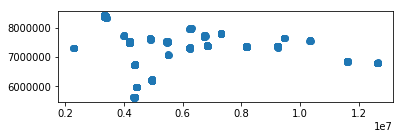

In [22]:
df_sample.plot()

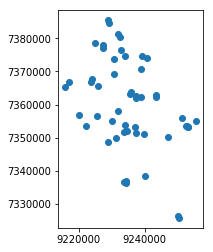

In [23]:
df_sample[df_sample['city_id'] == 1].plot()

Как отображать данные на карте прямо в ноутбуке Jupyter: статья от Андрея Жукова https://habrahabr.ru/company/ods/blog/338554/
![карта в Jupyter](img/jupyter.png)

### Операции с геометрией

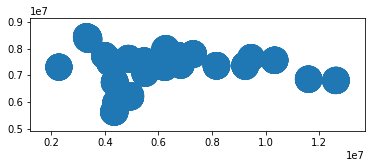

In [24]:
df_sample['geometry'] = df_sample['geometry'].buffer(500000)
df_sample.plot()

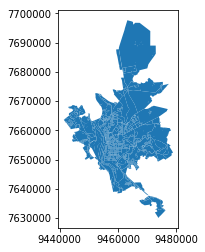

In [25]:
blocks = gpd.read_file('blocks-tomsk.gpkg')
blocks.plot()

In [26]:
blocks

,city_id,id,geometry
0,3,87359,(POLYGON ((9442572.690055247 7662207.959928776...
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,..."
2,3,87362,(POLYGON ((9442347.029929226 7662579.129950695...
3,3,87363,(POLYGON ((9442782.980757756 7663199.880169827...
4,3,87364,(POLYGON ((9441450.940033361 7663614.160017737...
5,3,87365,(POLYGON ((9443419.300286535 7665144.267970127...
6,3,87369,"(POLYGON ((9455029.841993721 7663316.91314031,..."
7,3,87370,(POLYGON ((9457151.265460147 7664788.481271663...
8,3,87373,"(POLYGON ((9459771.814175036 7664816.8286026, ..."
9,3,87427,(POLYGON ((9475331.142221007 7673513.720683024...


In [27]:
blocks_houses = gpd.sjoin(blocks, houses)

In [29]:
blocks_houses

,city_id_left,id_left,geometry,index_right,apt,apt_count,beer_apt,beer_count,center_dist,city_id_right,...,coffee_count,food_apt,food_count,id_right,interpolated,people_count,pop,quarter_id,transit_time,year
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",385925,8.0,1816.0,0.000000,0,0.0,3,...,0,0.000000,0,1201585,1,4513.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",387732,8.0,2008.0,0.000000,0,0.0,3,...,0,0.000000,0,1201588,1,4993.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",385549,8.0,1872.0,0.000000,0,0.0,3,...,0,0.000000,0,1201586,1,4653.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",385874,8.0,1944.0,0.000000,0,0.0,3,...,0,0.000000,0,1201587,1,4833.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",384643,8.0,2008.0,0.000000,0,0.0,3,...,0,0.000000,0,1201597,1,5020.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",385101,8.0,2064.0,0.000000,0,0.0,3,...,0,0.000000,0,1201596,1,5160.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",384587,8.0,2144.0,0.000000,0,0.0,3,...,0,0.000000,0,1201595,1,5360.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",386959,8.0,2176.0,0.000000,0,0.0,3,...,0,0.000000,0,1201594,1,5440.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",388189,8.0,2192.0,0.000000,0,0.0,3,...,0,0.000000,0,1201593,1,5480.0,20.0,87360,0,0.0
1,3,87360,"(POLYGON ((9442796.33987166 7662222.029913157,...",388457,8.0,2192.0,0.000000,0,0.0,3,...,0,0.000000,0,1201592,1,5480.0,20.0,87360,0,0.0


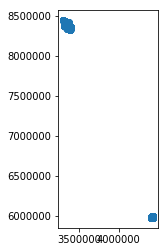

In [33]:
houses[houses['id'].isin(blocks_houses['index_right'].values)].plot()

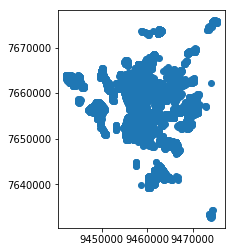

In [35]:
houses[houses['id'].isin(blocks_houses['id_right'].values)].plot()

In [42]:
block_stat = blocks_houses.reset_index().groupby(by='id_left').agg({'apt': 'sum', 'index_right': 'count', 'geometry': 'first'}).reset_index()

block_stat

,id_left,apt,index_right,geometry
0,87360,232.0,29,"(POLYGON ((9442796.33987166 7662222.029913157,..."
1,87362,536.0,67,(POLYGON ((9442347.029929226 7662579.129950695...
2,87363,1312.0,164,(POLYGON ((9442782.980757756 7663199.880169827...
3,87364,928.0,116,(POLYGON ((9441450.940033361 7663614.160017737...
4,87369,1448.0,101,"(POLYGON ((9455029.841993721 7663316.91314031,..."
5,87373,855.0,37,"(POLYGON ((9459771.814175036 7664816.8286026, ..."
6,87374,1136.0,142,(POLYGON ((9458313.795875032 7665484.464042699...
7,87389,312.0,39,(POLYGON ((9447607.074311962 7664200.547225116...
8,87391,1344.0,168,(POLYGON ((9450298.413662884 7654352.776513327...
9,87392,1341.0,127,(POLYGON ((9452285.551387094 7671648.657247525...


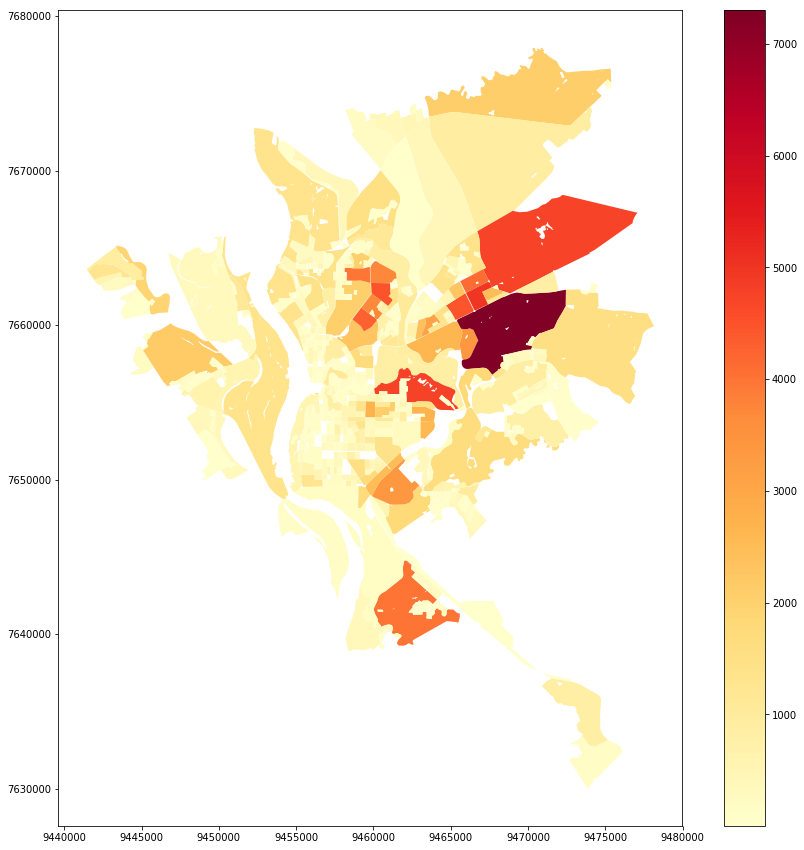

In [68]:
block_stat = gpd.GeoDataFrame(block_stat, crs={'init': 'epsg:3857'})
block_stat.rename(columns={'index_right': 'houses_number', 'apt': 'apt_number'}, inplace=True)
block_stat.plot(column = 'apt_number', linewidth=0, cmap='YlOrRd', legend=True, figsize=[15,15])

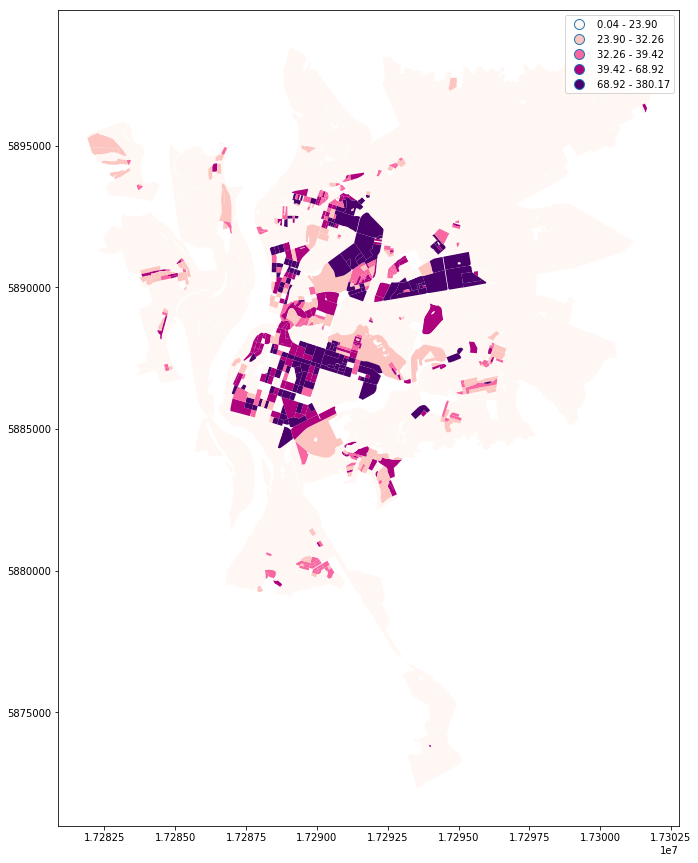

In [75]:
SIB = '+proj=aea +lat_1=52 +lat_2=64 +lat_0=0 +lon_0=105 +x_0=18500000 +y_0=0 +ellps=krass +units=m +towgs84=28,-130,-95,0,0,0,0 +no_defs'

block_stat = block_stat.to_crs(SIB)
block_stat['area'] = block_stat['geometry'].area
block_stat['apt_density'] = block_stat['apt_number'] / block_stat['area'] * 10000
block_stat.plot(column = 'apt_density', scheme='QUANTILES', linewidth=0, cmap='RdPu', legend=True, figsize=[15,15])

Как записать файл:

In [76]:
block_stat.to_file('tomsk-block-stat.gpkg', driver='GPKG')

Если не пишется файл, проверить: 

In [77]:
import fiona
fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPKG': 'rw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

Если нет GPKG: https://github.com/Toblerity/Fiona/issues/400

    pip install -I fiona --no-binary fiona

## Организация скриптов: модуль argh

Как по идее должно быть:

In [35]:
import argparse

def main(*args, **kwargs):
    pass


if __name__ == '__mаin__':
    argparser = argparse.ArgParser()
    argparser.add_argument('-n', '--names', dest='names_only', action='store_true',
                                help='Display column names and indices from the input CSV and exit.')
    argparser.add_argument('-c', '--columns', dest='columns',
                                help='A comma separated list of column indices or names to be extracted. Defaults to all columns.')
    argparser.add_argument('-C', '--not-columns', dest='not_columns',
                                help='A comma separated list of column indices or names to be excluded. Defaults to no columns.')
    argparser.add_argument('-x', '--delete-empty-rows', dest='delete_empty', action='store_true',
                                help='After cutting, delete rows which are completely empty.')

    main(argparser.parse_arguments())


Как происходит обычно:

In [ ]:
import sys

names, columns, not_columns, delete_empty = sys.argv[1:]

# код программы
pass


Оба примера функционально выполняют одно и то же.

**Плохой подход:** сказать, что мы должны стремиться к первому "правильному" варианту.

**Хороший подход:** найти способ, чтобы первый подход делался сам и без усилий.


In [ ]:
import argh
import pandas as pd

@argh.dispatch_command
def main(shops_file, cities_file, output_file):
    shops = pd.read_csv(shops_file)
    cities = pd.read_csv(cities_file)
    
    pass

    data.to_csv(output_file)

        

**Что это даёт?**

1. Параметризуемый скрипт сразу
2. Скрипт, который можно выполнить в командной строке и увидеть текст подсказок, какие нужны параметры
3. Можно легко создать такой новый скрипт и не жалко выбросить, если не нужен


## Шелл-скрипты

### Как сделать текстовую замену?
https://unix.stackexchange.com/questions/159367/

    sed -i -e 's/few/asd/g' hello.txt

### Как сосчитать строки в файлах в папке, рекурсивно?
https://stackoverflow.com/questions/1358540/

    find . -name '*.php' | xargs wc -l
 
### Как посчитать сумму второй колонки?
https://stackoverflow.com/questions/18683368/

    awk -F"," '{print;x+=$2}END{print "Total " x}' ./test.csv

* сложный синтаксис
* непоследовательности: типы данных
* повторное использование почти невозможно
* тонкости реализации и неявная разница между платформами (bash vs sh, комп vs docker)

В итоге

* stackoverflow-driven development (google <вопрос> => stackoverflow.com/... => ctrl+c & ctrl+v)
* рост сложности
* дилемма: дописать костыль или переделывать всё на языке программирования



### Где шелл-скрипты всё-таки применимы


* Набросок. Шелл-скрипт лучше тыков в интерфейсе (можно перезапустить точно то же самое).


    csvgrep -c name "Мусохраново" cities.csv > /tmp/filtered.csv


* Параметры к своим скриптам:

In [ ]:
#my_script.py
import argh

@argh.dispatch_command
def my_script(a, b=None):
    print('A:', a, 'B:', b)


In [ ]:
# my_shell_script.sh
python3 my_script.py 10 -b 20

* Makefile, управление зависимостями данных


## Makefile

Рано или поздно проект вырастает до шелл-скипта **all.sh** или **do.sh** такого вида:

    1.download-houses.sh
    2.download-osm.sh
    3.prepare-houses.sh
    4.prepare-blocks.sh
    5.resutls.sh
    6.draw_maps.sh

Однако есть 2 проблемы:

* Структура многих проектов с вычислениями быстро становится нелинейной:

    1. Список городов => получение данных по домам
    2. Список городов => получение линий улиц из OSM
    3. Данные по домам => геокодирование
    4. Улицы => кварталы
    5. Геокодированные дома + кварталы => плотность по кварталам

* В нелинейных обработках есть длинные этапы, которые надо пропустить

Из обследованных мной систем только GNU Make умеет держать граф зависимостей и пропускать шаги в длинной цепочке, если файлы не поменялись.

```
houses-nsk.csv: houses.csv
    csvgrep $^ -c addr -m Новосибирск > $@

houses-krk.csv: houses.csv
    csvgrep $^ -c addr -m Красноярск > $@

houses-sib.csv: houses-nsk.csv houses-krk.csv
    csvstack $^ > $@

```

#### Как не потеряться в больших Makefile?

1. Скачать скрипт:

       wget http://beercoffee.peshemove.org/makefile2dot.py.zip
    
2. Установить библиотеку graphviz. В Linux работает так:

       sudo apt-get install graphviz
    
    В Anaconda:
 
       conda install -c anaconda graphviz
      
* Добавить правило в сам Makefile:

      diagram.png: Makefile
          python makefile2dot.py < Makefile | dot -Tpng > diagram.png

* Выполнить в консоли:

      make diagram.png


Проба:

In [59]:
%%bash
echo "Содержимое Makefile:"
echo "======================"
cat Makefile
echo "======================"
touch houses.csv
rm diagram.png
wget http://beercoffee.peshemove.org/makefile2dot.py.zip -nc
unzip -o makefile2dot.py.zip
echo
make diagram.png

Содержимое Makefile:
houses-nsk.csv: houses.csv
	csvgrep $^ -c addr -m Новосибирск > $@

houses-krk.csv: houses.csv
	csvgrep $^ -c addr -m Красноярск > $@

houses-sib.csv: houses-nsk.csv houses-krk.csv
	csvstack $^ > $@

diagram.png: Makefile
	python makefile2dot.py < Makefile | dot -Tpng > diagram.png
Archive:  makefile2dot.py.zip
  inflating: makefile2dot.py         

python makefile2dot.py < Makefile | dot -Tpng > diagram.png


File ‘makefile2dot.py.zip’ already there; not retrieving.



![Диаграмма Makefile](diagram.png)

## Статистические модели. XGBoost

Установка: http://xgboost.readthedocs.io/en/latest/build.html

    git clone --recursive https://github.com/dmlc/xgboost
    cd xgboost; make -j4

Установка питоновского пакета:

    cd python-package
    python3 setup.py develop --user

In [3]:
import geopandas as gpd, pandas as pd

In [4]:
houses_init_df = gpd.read_file('houses.gpkg')

In [5]:
list(houses_init_df)

['apt',
 'apt_count',
 'beer_apt',
 'beer_count',
 'center_dist',
 'city_id',
 'coffee_apt',
 'coffee_count',
 'food_apt',
 'food_count',
 'id',
 'interpolated',
 'people_count',
 'pop',
 'quarter_id',
 'transit_time',
 'year',
 'geometry']

In [6]:
selected_cities = [23,32,3,7,11,13,15,16,9,31,19,2,24,38,47]
x_columns = ['year', 'transit_time', 'apt_count', 'coffee_count', 'city_id', 'food_apt']

houses_df = houses_init_df[houses_init_df['city_id'].isin(selected_cities)]


In [7]:
from numpy import loadtxt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


### Тестовая выборка - каждая 5-я запись

In [8]:
houses_test = houses_df[::5]

x_test = houses_test[x_columns].as_matrix()
y_test = houses_test['beer_apt'].as_matrix()

### Обучающая выборка - остальные записи

In [9]:
houses_learn = houses_df[~houses_df.index.isin(houses_test.index.values) & ~houses_df['interpolated']]
x_learn = houses_learn[x_columns].as_matrix()
y_learn = houses_learn['beer_apt'].as_matrix()

In [10]:
x_learn, y_learn

(array([[0.00000000e+00, 6.50000000e+01, 0.00000000e+00, 0.00000000e+00,
         3.20000000e+01, 0.00000000e+00],
        [0.00000000e+00, 5.50000000e+01, 0.00000000e+00, 0.00000000e+00,
         3.20000000e+01, 0.00000000e+00],
        [0.00000000e+00, 6.00000000e+01, 0.00000000e+00, 0.00000000e+00,
         3.20000000e+01, 0.00000000e+00],
        ...,
        [1.95200000e+03, 7.00000000e+01, 3.05600000e+03, 0.00000000e+00,
         1.60000000e+01, 2.94502618e-03],
        [1.96300000e+03, 3.50000000e+01, 4.17000000e+03, 6.00000000e+00,
         2.40000000e+01, 6.47482014e-03],
        [1.94200000e+03, 4.50000000e+01, 1.55400000e+03, 0.00000000e+00,
         1.50000000e+01, 5.79150579e-03]]),
 array([0.        , 0.        , 0.        , ..., 0.00065445, 0.00095923,
        0.0019305 ]))

In [11]:
model = XGBRegressor()
model.fit(x_learn, y_learn)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [12]:
y_pred = model.predict(x_test)

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5274718119398756

In [14]:
houses_df = houses_df.copy()
houses_df.crs = {'init': 'epsg:3857'}
houses_df['beer_predict'] = model.predict(houses_df[x_columns].as_matrix())
houses_df['beer_predict_error'] = houses_df['beer_apt'] - houses_df['beer_predict']

In [ ]:
houses_df = pd.DataFrame(houses_df)
houses_df['geometry'] = houses_df['geometry'].apply(lambda g: g.wkt)
houses_df.to_csv('houses-predict.csv')